Matplotlib is building the font cache; this may take a moment.


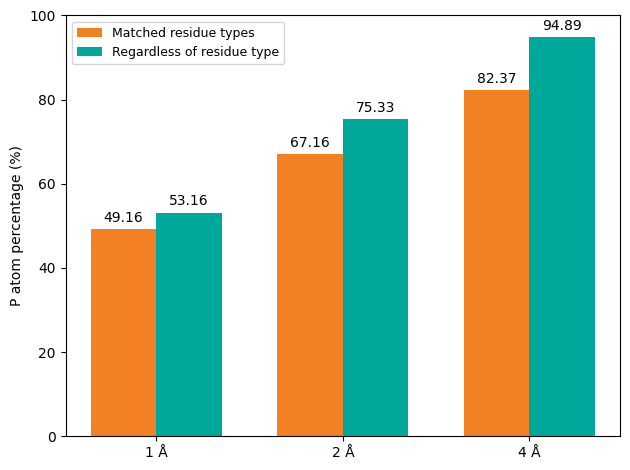

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ['1 Å', '2 Å', '4 Å']
orange_values = [49.16, 67.16, 82.37]
cyan_values = [53.16, 75.33, 94.89]

x = np.arange(len(categories))  # 横坐标位置
width = 0.35  # 柱状图的宽度

# 创建图表
fig, ax = plt.subplots()

# 绘制柱状图
bars1 = ax.bar(x - width/2, orange_values, width, label='Matched residue types', color='#F28124')  # 橙色柱
bars2 = ax.bar(x + width/2, cyan_values, width, label='Regardless of residue type', color='#00A89C')  # 青色柱

# 添加标签和标题
ax.set_ylabel('P atom percentage (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 100)

# 添加图例
ax.legend(loc='upper left', fontsize=9)

# 显示数值标签
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# 调整图像布局
plt.tight_layout()

# 显示图表
plt.show()